In [61]:
import numpy as np
import matplotlib.pyplot as plt
import polars as pl
from pathlib import Path

In [62]:
root = Path("/home/nicolas/Documents/PhD/Workspace/nucleo/outputs/2025-11-14__PC/nucleo__shorttest_0")
paths = [str(p) for p in root.glob("*/**/*.parquet")] or [str(p) for p in root.glob("*/*.parquet")]
df_sorted = (
    pl.scan_parquet(paths)
    .collect()
    .sort(by=["landscape", "l", "lmbda"],
          descending=[False, False, False]
        )
)

print(df_sorted)

SchemaError: data type mismatch for column alpha_mean_eff: incoming: Float64 != target: Null

In [54]:
# chromatin
Lmin        = df_sorted["Lmin"][0]
Lmax        = df_sorted["Lmax"][0]
bps         = df_sorted["bps"][0]
L = np.arange(Lmin, Lmax, bps)

# time
tmax        = df_sorted["tmax"][0]
dt          = df_sorted["dt"][0]
t = np.arange(0, tmax, dt)

# probas
mu          = df_sorted["mu"][0]
theta       = df_sorted["theta"][0]
rtot_bind   = df_sorted["rtot_bind"][0]
rtot_rest   = df_sorted["rtot_rest"][0]


# s = 0
results_s0          = df_sorted["results"][0].to_numpy()
t_matrix_s0         = df_sorted["t_matrix"][0]. to_numpy()
x_matrix_s0         = df_sorted["x_matrix"][0]. to_numpy()
results_mean_s0     = df_sorted["results_mean"][0].to_numpy()
s0                  = df_sorted["s"][0]
l0                  = df_sorted["l"][0]
# v_th_sim_s0         = df_sorted["v_th_sim"].to_numpy()
# print(v_th_sim_s0)

# s = 30
results_s30         = df_sorted["results"][1].to_numpy()
t_matrix_s30        = df_sorted["t_matrix"][1]. to_numpy()
x_matrix_s30        = df_sorted["x_matrix"][1]. to_numpy()
results_mean_s30    = df_sorted["results_mean"][1].to_numpy()
s30                 = df_sorted["s"][1]
l30                 = df_sorted["l"][1]
# v_th_sim_s30        = df_sorted["v_th_sim"][1]

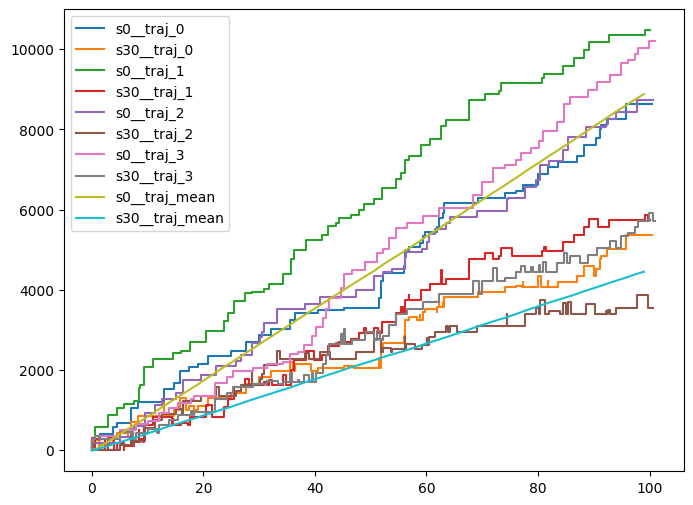

In [56]:
plt.figure(figsize=(8,6))
for i in range(0,4):
    plt.step(t_matrix_s0[i], x_matrix_s0[i], label=f"s0__traj_{i}")
    plt.step(t_matrix_s30[i], x_matrix_s30[i], label=f"s30__traj_{i}")
plt.plot(results_mean_s0, label=f"s0__traj_mean")
plt.plot(results_mean_s30, label=f"s30__traj_mean")
# plt.plot(t, v_th_sim_s0*t, c="k", label="theory free")
# plt.plot(t, v_th_sim_s30*t, c="k", label="theory free")
plt.legend()
plt.show()